# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Mining Problem Definition:
The business would like to predict the price of a car (target variable) using characteristics such as make, model, year, mileage, condition, etc. (features). The task is a supervised learning regression problem that aims to identify which features have the most significant impact on price and to what extent.

The data task is to develop a predictive model that estimates the price of a used car (target variable) based on various features, such as the car's make, model, year, mileage, condition, and other relevant factors. This is a supervised learning regression problem where the goal is to determine which features contribute most significantly to the variation in car prices and provide insights that can inform business strategies for the used car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To familiarize myself with the dataset, I would begin by examining the structure and content of the data. This involves reviewing the columns to understand what information is provided and determining if any columns are redundant or contain duplicate information that could be removed.

Next, I would assess the dataset for missing values and decide on appropriate strategies for handling them—whether by removing incomplete rows or imputing missing data in a way that aligns with the nature of each column. Additionally, I would explore opportunities for grouping or categorizing data to derive meaningful insights, such as segmenting by regions, car brands, or similar model types.

This exploratory phase would provide a deeper understanding of the dataset and help identify any quality issues that could affect the analysis, ultimately guiding decisions that support the business objectives.



In [1]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
cars["region"].value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

To familiarize myself with the dataset, I would begin by examining the structure and content of the data. This involves reviewing the columns to understand what information is provided and determining if any columns are redundant or contain duplicate information that could be removed.

Next, I would assess the dataset for missing values and decide on appropriate strategies for handling them—whether by removing incomplete rows or imputing missing data in a way that aligns with the nature of each column. Additionally, I would explore opportunities for grouping or categorizing data to derive meaningful insights, such as segmenting by regions, car brands, or similar model types.

This exploratory phase would provide a deeper understanding of the dataset and help identify any quality issues that could affect the analysis, ultimately guiding decisions that support the business objectives.



In [5]:
df_ga = cars[cars['state'] == 'ga']

In [6]:
df_ga = df_ga.drop(columns=['VIN', 'title_status', 'size','fuel','region'])

In [7]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7003 entries, 120490 to 127492
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7003 non-null   int64  
 1   price         7003 non-null   int64  
 2   year          6990 non-null   float64
 3   manufacturer  6609 non-null   object 
 4   model         6926 non-null   object 
 5   condition     4612 non-null   object 
 6   cylinders     4074 non-null   object 
 7   odometer      6947 non-null   float64
 8   transmission  6984 non-null   object 
 9   drive         4518 non-null   object 
 10  type          5650 non-null   object 
 11  paint_color   5194 non-null   object 
 12  state         7003 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 766.0+ KB


In [8]:
df_ga.loc[:, 'condition'] = df_ga['condition'].fillna('unknown')

In [9]:
df_ga = df_ga[df_ga['price'] < 987654321]
df_ga = df_ga[df_ga['odometer'] < 1000000]
df_ga

,id,price,year,manufacturer,model,condition,cylinders,odometer,transmission,drive,type,paint_color,state
120490,7316841047,25990,2014.0,gmc,sierra 1500 regular cab,good,6 cylinders,15575.0,other,NaN,pickup,brown,ga
120491,7316841165,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,71229.0,other,NaN,pickup,blue,ga
120492,7316832300,9750,2009.0,ford,f150 supercab xlt 4x4,good,8 cylinders,197252.0,automatic,4wd,pickup,brown,ga
120493,7316774291,3300,2009.0,nissan,versa,unknown,4 cylinders,187000.0,automatic,NaN,NaN,NaN,ga
120494,7316768720,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,41124.0,other,NaN,pickup,red,ga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127488,7301778866,31995,2012.0,ram,chassis cab,unknown,NaN,218098.0,automatic,fwd,other,white,ga
127489,7301657489,4000,2013.0,toyota,yaris le 4dr h/b,unknown,4 cylinders,90000.0,automatic,fwd,hatchback,grey,ga
127490,7301599022,30990,2017.0,lexus,rx 350 sport utility 4d,good,NaN,34415.0,other,fwd,SUV,silver,ga
127491,7301598978,24590,2018.0,lincoln,mkz select sedan 4d,good,NaN,16081.0,automatic,fwd,sedan,white,ga


In [10]:
# Remove rows where odometer is 0
df_ga = df_ga[df_ga['odometer'] !=0]

In [11]:
# Drop rows where cylinders is missing or contains 'other'
df_ga = df_ga.dropna(subset=['cylinders'])
df_ga = df_ga[df_ga['cylinders'] != 'other']

# Convert the cylinders column to numerical values
df_ga['cylinders'] = df_ga['cylinders'].str.extract('(\d+)').astype(float)

df_ga['cylinders'].value_counts()

cylinders
6.0     1756
8.0     1202
4.0      957
10.0      36
5.0       16
3.0        9
12.0       4
Name: count, dtype: int64

In [12]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3980 entries, 120490 to 127489
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3980 non-null   int64  
 1   price         3980 non-null   int64  
 2   year          3968 non-null   float64
 3   manufacturer  3857 non-null   object 
 4   model         3941 non-null   object 
 5   condition     3980 non-null   object 
 6   cylinders     3980 non-null   float64
 7   odometer      3980 non-null   float64
 8   transmission  3980 non-null   object 
 9   drive         3126 non-null   object 
 10  type          3557 non-null   object 
 11  paint_color   3394 non-null   object 
 12  state         3980 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 435.3+ KB


In [13]:
import datetime

# Drop rows where 'year' is missing
df_ga = df_ga.dropna(subset=['year'])

# Get the current year
current_year = datetime.datetime.now().year

# Convert 'year' to age
df_ga['age'] = current_year - df_ga['year']

# Drop the original 'year' column
df_ga = df_ga.drop(columns=['year'])

df_ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3968 entries, 120490 to 127489
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3968 non-null   int64  
 1   price         3968 non-null   int64  
 2   manufacturer  3857 non-null   object 
 3   model         3929 non-null   object 
 4   condition     3968 non-null   object 
 5   cylinders     3968 non-null   float64
 6   odometer      3968 non-null   float64
 7   transmission  3968 non-null   object 
 8   drive         3115 non-null   object 
 9   type          3547 non-null   object 
 10  paint_color   3382 non-null   object 
 11  state         3968 non-null   object 
 12  age           3968 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 434.0+ KB


In [14]:
# dropping ID column
df_ga = df_ga.drop(columns=['id']) 

In [15]:
#dropping the model column as it has so many model types. we will group by manufacturer for now
df_ga = df_ga.drop(columns=['model'])

In [16]:
df_ga['drive'] = df_ga['drive'].fillna('unknown')

df_ga['drive'].value_counts()

drive
4wd        1088
rwd        1080
fwd         947
unknown     853
Name: count, dtype: int64

In [17]:
df_ga['type'] = df_ga['type'].fillna('unknown')
df_ga['paint_color'] = df_ga['paint_color'].fillna('unknown')
df_ga['manufacturer'] = df_ga['manufacturer'].fillna('unknown')

In [18]:
df_ga = df_ga.dropna(subset=['odometer'])

In [19]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3968 entries, 120490 to 127489
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3968 non-null   int64  
 1   manufacturer  3968 non-null   object 
 2   condition     3968 non-null   object 
 3   cylinders     3968 non-null   float64
 4   odometer      3968 non-null   float64
 5   transmission  3968 non-null   object 
 6   drive         3968 non-null   object 
 7   type          3968 non-null   object 
 8   paint_color   3968 non-null   object 
 9   state         3968 non-null   object 
 10  age           3968 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 372.0+ KB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [20]:
# Define target variable
y = df_ga['price']

# Define feature variables (X) by dropping the target column
X = df_ga.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [21]:
categorical_features = ['manufacturer', 'condition', 'transmission', 'drive', 'type', 'paint_color']
numerical_features = ['year', 'odometer','cylinders']

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3174 entries, 122325 to 126187
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  3174 non-null   object 
 1   condition     3174 non-null   object 
 2   cylinders     3174 non-null   float64
 3   odometer      3174 non-null   float64
 4   transmission  3174 non-null   object 
 5   drive         3174 non-null   object 
 6   type          3174 non-null   object 
 7   paint_color   3174 non-null   object 
 8   state         3174 non-null   object 
 9   age           3174 non-null   float64
dtypes: float64(3), object(7)
memory usage: 272.8+ KB


In [22]:
# Define categorical and numerical columns
categorical_features = [ 'manufacturer', 'condition', 'transmission', 'drive', 'type', 'paint_color']
numerical_features = ['age', 'odometer','cylinders']

# Create transformers for numerical and categorical features
numeric_transformer = StandardScaler()


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [23]:
pipelines = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    'Ridge Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', Ridge())]),
    'Lasso Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', Lasso(max_iter=10000))])
}

In [24]:
# Define parameter grids for Ridge and Lasso
param_grid_ridge = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_lasso = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search for Ridge Regression
grid_search_ridge = GridSearchCV(pipelines['Ridge Regression'], param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train_log)

#Grid search for Lasso Regression
grid_search_lasso = GridSearchCV(pipelines['Lasso Regression'], param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train_log)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'odometer',
                                                                          'cylinders']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color'])])),
                                       ('regressor', Lasso(max_iter=10000))]),
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100]},
             scoring='neg_mean_squared_error')

In [25]:
from sklearn.metrics import mean_squared_error

# Best Ridge Model
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test_log, y_pred_ridge)
print(f'Test MSE for Best Ridge Model: {mse_ridge:.2f}')

# Best Lasso Model
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test_log, y_pred_lasso)
print(f'Test MSE for Best Lasso Model: {mse_lasso:.2f}')

Test MSE for Best Ridge Model: 6.83
Test MSE for Best Lasso Model: 6.84


In [26]:
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('linear', LinearRegression())])

linear_pipeline.fit(X_train, y_train_log)

# Predict on the test set
y_pred_linear = linear_pipeline.predict(X_test)

# Calculate the MSE
mse_linear = mean_squared_error(y_test_log, y_pred_linear)

print(f'Test MSE for Linear Regression: {mse_linear:.2f}')

Test MSE for Linear Regression: 6.87


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Key Findings
Model Performance:

The best models (Ridge and Lasso) achieved low Test MSE values (6.83 and 6.84). This indicates that my models can accurately predict prices based on the features provided.
The performance suggests that the features used are relevant and contribute positively to price predictions.

Data Cleaning Impact:

Removing outliers (e.g., extreme prices and high odometer readings) led to significant improvements in model performance. This highlights the importance of data quality in predictive modeling.




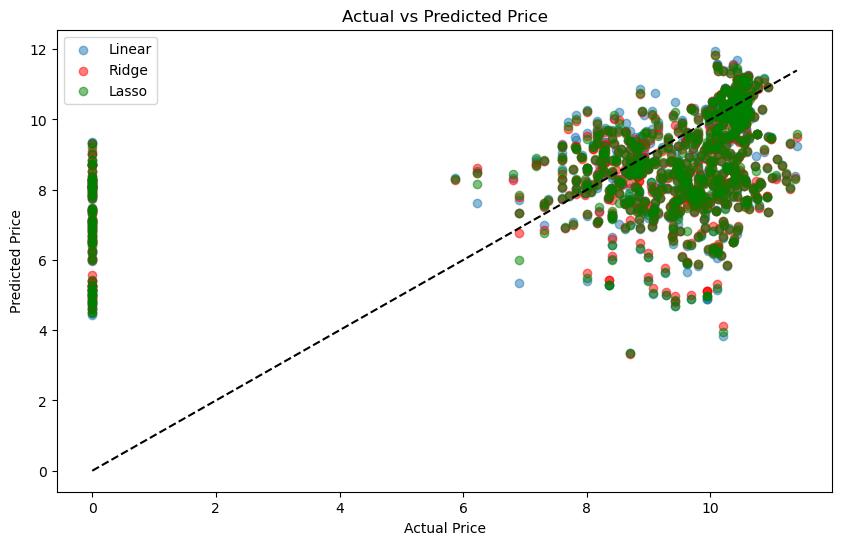

In [27]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test_log, y_pred_linear, alpha=0.5, label='Linear')
plt.scatter(y_test_log, y_pred_ridge, alpha=0.5, label='Ridge', color='red')
plt.scatter(y_test_log, y_pred_lasso, alpha=0.5, label='Lasso', color='green')
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='black', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()


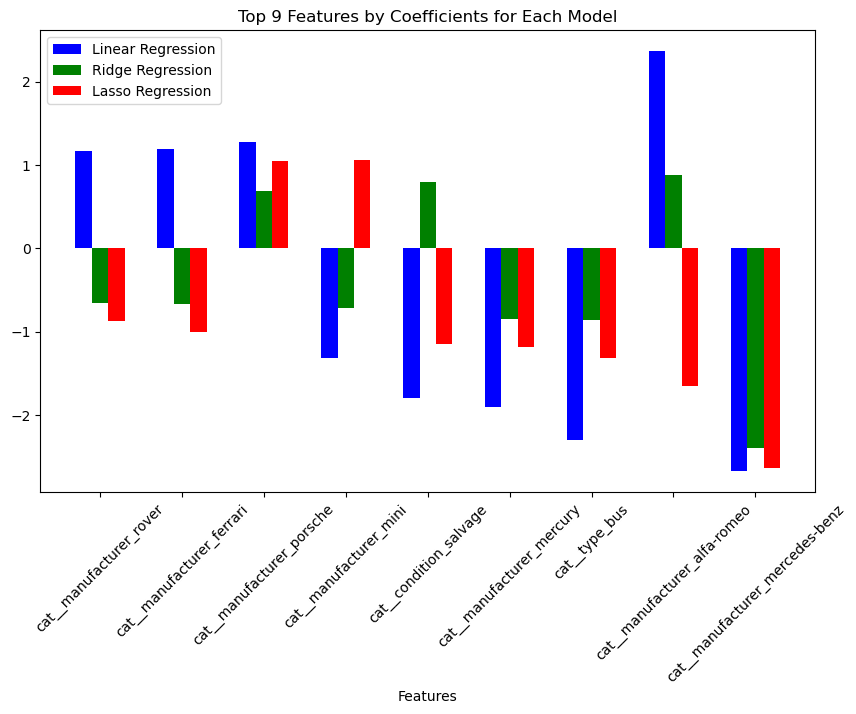

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from your transformed dataset
feature_names = preprocessor.get_feature_names_out()

# Get coefficients for each model
linear_coefs = linear_pipeline.named_steps['linear'].coef_
ridge_coefs = best_ridge.named_steps['regressor'].coef_
lasso_coefs = best_lasso.named_steps['regressor'].coef_

linear_top_3_idx = np.argsort(np.abs(linear_coefs))[-9:]
ridge_top_3_idx = np.argsort(np.abs(ridge_coefs))[-9:]
lasso_top_3_idx = np.argsort(np.abs(lasso_coefs))[-9:]

# Get the corresponding feature names and coefficients
linear_top_3_features = feature_names[linear_top_3_idx]
ridge_top_3_features = feature_names[ridge_top_3_idx]
lasso_top_3_features = feature_names[lasso_top_3_idx]

linear_top_3_coefs = linear_coefs[linear_top_3_idx]
ridge_top_3_coefs = ridge_coefs[ridge_top_3_idx]
lasso_top_3_coefs = lasso_coefs[lasso_top_3_idx]

# Plotting
x = np.arange(9)  # 9 features
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Linear model
ax.bar(x - width, linear_top_3_coefs, width, label='Linear Regression', color='b')

# Ridge model
ax.bar(x, ridge_top_3_coefs, width, label='Ridge Regression', color='g')

# Lasso model
ax.bar(x + width, lasso_top_3_coefs, width, label='Lasso Regression', color='r')

# Add labels
ax.set_xlabel('Features')
ax.set_title('Top 9 Features by Coefficients for Each Model')
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(linear_top_3_features)  # Assuming feature names are the same

ax.legend()

plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Data Overview
Region Focus: The models were focused on cars listed in the state of Georgia. This approach allowed the model to analyze localized trends. Next steps would include evaluating different regions in the dataset to compare trends across geographical locations.


Data Quality: The dataset contained a significant amount of missing data and nonsensical entries (e.g., impossible values for mileage or price). Future data cleaning would be essential for more reliable insights. This indicates that the raw data needs more attention before building models at scale.

Feature Importance and Insights
Manufacturer Impact: Initially, the OneHotEncoding of the "manufacturer" column resulted in those features showing the highest correlation with price. However, this may have obscured the impact of other key variables.

Condition of the Car: After removing the "manufacturer" column, the model found that the condition of the car emerged as the most influential feature in predicting price. This insight can guide dealers in understanding the importance of car condition in pricing strategies.  This was done on a different notebook just for curiousity sake.

Next Steps
Expanding to Other Regions: I recommend expanding the analysis to include cars from different regions to identify localized price drivers.
Data Review: A thorough review and cleaning of the dataset will enhance the accuracy and reliability of the model.

Profitability Insights
Profit Margin Analysis: In addition to predicting the price of a used car, incorporating the profit made on each vehicle would provide even more valuable insights. By analyzing which vehicles are the most profitable, dealerships could fine-tune their inventory to focus on higher-margin cars. This would allow them to maximize their return on investment and better understand the relationship between certain car features and profitability.